# Data Preprocessing Tools

## Importing the libraries

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [3]:
data = pd.read_csv('Data.csv')
y=data.iloc[:,-1].values
x=data.iloc[:,:-1].values
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Taking care of missing data

In [4]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])

In [5]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Independent Variable

In [8]:
from sklearn.preprocessing import LabelEncoder

### Encoding the Dependent Variable

In [9]:
lb=LabelEncoder()
y=lb.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8)

In [12]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## Feature Scaling

In [13]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


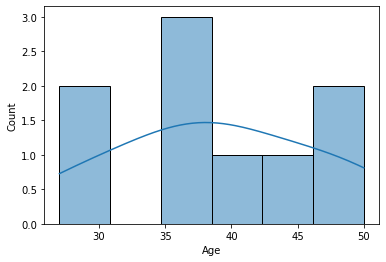

In [14]:
import seaborn as sns
sns.histplot(data.Age,bins=6,kde=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
x_train[:,3:]=sc.fit_transform(x_train[:,3:])
x_test[:,3:]=sc.transform(x_test[:,3:])

In [17]:
print(x_test)

[[0.0 1.0 0.0 -2.241740892035459 -1.3159629351990891]
 [0.0 0.0 1.0 -2.8344165746299006 -1.92463101657597]]


# Linear regression with sklearn

In [18]:
regr=LinearRegression()

In [21]:
results=regr.fit(x_train,y_train)

array([ 0.32478708,  0.26698864, -0.59177571, -0.219531  , -0.0420472 ])

In [23]:
results.score(x_test,y_test)

-2.4832740535253803